## Deep Learning with PyTorch : Neural Style Transfer

## Task 1 : Set Google Colab runtime

![](https://archive.org/download/deep-learning-with-py-torch/Deep%20Learning%20with%20PyTorch.png)

In [1]:
!pip install torch torchvision

In [2]:
!git clone https://github.com/parth1620/Project-NST.git

Cloning into 'Project-NST'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 19 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (19/19), done.


## Task 2 : Loading VGG Pretrained Model

In [3]:
import torch
from torchvision import models

vgg= models.vgg19(pretrained =True)
print(vgg)

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth



VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), pad

In [4]:
vgg =vgg.features
print(vgg)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [5]:
for parameters in vgg.parameters():
  parameters.requires_grad_(False)

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [7]:
vgg.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

## Task 3 : Preprocess image

Torchvision models page : https://pytorch.org/docs/stable/torchvision/models.html

In [8]:
from PIL import Image
from torchvision import transforms as T
def preprocess(img_path,max_size=500):
  image= Image.open(img_path).convert('RGB')
  if max(image.size) > max_size:
    size=max_size
  else:
    size= max(image.size)
  
  img_transforms=T.Compose([
                            T.Resize(size),
                            T.ToTensor(),
                            T.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225])
                            ])
  image=img_transforms(image)
  image=image.unsqueeze(0)
  return image

In [45]:
content_p = preprocess('/content/Project-NST/content10.jpg')
style_p =preprocess('/content/Project-NST/style10.jpg')

content_p= content_p.to(device)
style_p = style_p.to(device)
print('content shape:', content_p.shape)
print('style shape:', style_p.shape)

content shape: torch.Size([1, 3, 487, 487])
style shape: torch.Size([1, 3, 500, 765])


## Task 4 : Deprocess image

In [46]:
import numpy as np
import matplotlib.pyplot as plt
def deprocess(tensor):
  image=tensor.to('cpu').clone()
  image=image.numpy()
  image=image.squeeze(0)
  image=image.transpose(1,2,0)
  image=image * np.array([0.229,0.224,0.225]) + np.array([0.485,0.456,0.406])
  image= image.clip(0,1)
  return image

In [47]:
content_d=deprocess(content_p)
style_d=deprocess(style_p)
print('Deprocess content shape:', content_d.shape)
print('Deprocess style shape:', style_d.shape)

Deprocess content shape: (487, 487, 3)
Deprocess style shape: (500, 765, 3)


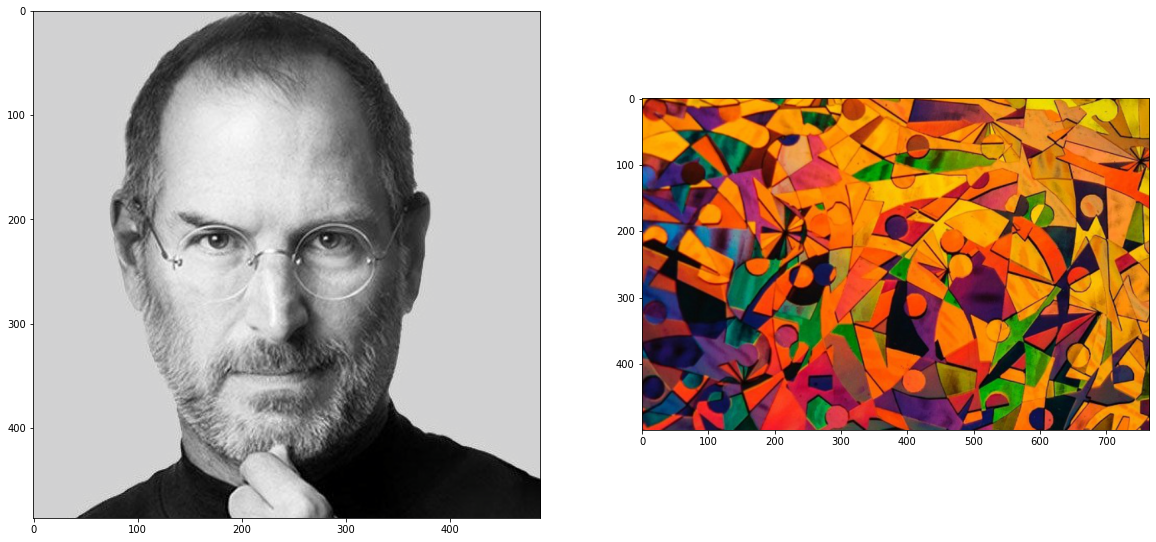

In [48]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
ax1.imshow(content_d)
ax2.imshow(style_d)

## Task 5 : Get content,style features and create gram matrix

In [49]:
def get_features(image,model):
  layers={
      '0':'conv1_1',
      '5':'conv2_1',
      '10':'conv3_1',
      '19':'conv4_1',
      '21':'conv4_2',
      '28':'conv5_1'
  }
  x=image
  Features={}

  for name,layer in model._modules.items():
    x=layer(x)
    if name in layers:
      Features[layers[name]]=x
  return Features


In [50]:
content_f= get_features(content_p,vgg)
style_f= get_features(style_p,vgg)

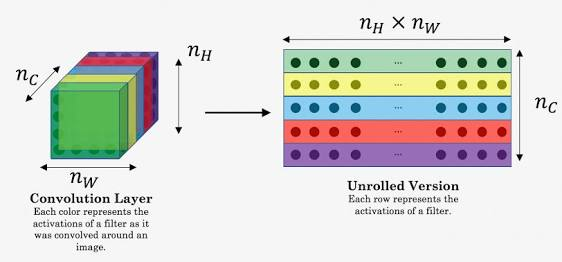

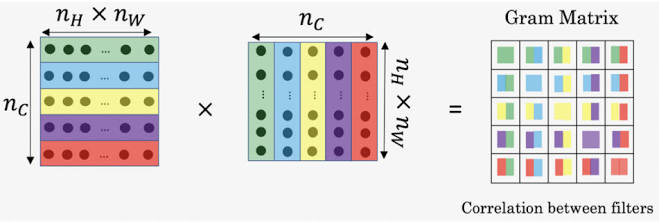

In [51]:
def gram_mat(tensor):
  b,c,h,w =tensor.size()
  tensor= tensor.view(c,h*w)
  gram=torch.mm(tensor,tensor.t())
  return gram

In [52]:
style_grams={layer : gram_mat(style_f[layer]) for layer in style_f}

## Task 6 : Creating Style and Content loss function

In [53]:
def content_loss(target_conv4_2,content_conv4_2):
  loss= torch.mean((target_conv4_2 - content_conv4_2)**2)
  return loss

In [54]:
style_weights={
    'conv1_1' :1.0,
    'conv2_1' :0.75,
    'conv3_1' :0.2,
    'conv4_1' :0.2,
    'conv5_1' :0.2
}

In [55]:
def style_loss(style_weights,target_features,style_grams):
  loss=0
  for layer in style_weights:
    target_f= target_features[layer]
    target_grams=gram_mat(target_f)
    style_gram=style_grams[layer]
    b,c,h,w=target_f.shape
    layer_loss= style_weights[layer] * torch.mean((target_grams - style_gram)**2)
    loss+=layer_loss/(c*h*w)
  return loss

In [56]:
target = content_p.clone().requires_grad_(True).to(device)
target_f=get_features(target,vgg)
print('Content Loss : ',content_loss(target_f['conv4_2'], content_f['conv4_2']))
print('Style Loss: ',style_loss(style_weights,target_f,style_grams))

Content Loss :  tensor(0., device='cuda:0', grad_fn=<MeanBackward0>)
Style Loss:  tensor(3823.5757, device='cuda:0', grad_fn=<AddBackward0>)


## Task 7 : Training loop

In [57]:
from torch import optim
optimizer= optim.Adam([target],lr=0.003)
alpha =1
beta=1e5
epochs=3000
show_every =500

In [58]:
def total_loss(c_loss,s_loss,alpha ,beta):
  loss= alpha*c_loss+beta*s_loss
  return loss

In [59]:
results=[]
for i in range(epochs):
  target_f=get_features(target,vgg)
  c_loss=content_loss(target_f['conv4_2'], content_f['conv4_2'])
  s_loss=style_loss(style_weights,target_f,style_grams)
  t_loss=total_loss(c_loss,s_loss,alpha,beta)

  optimizer.zero_grad()
  t_loss.backward()
  optimizer.step()

  if i% show_every ==0:
    print('Total loss at Epoch {}:{}'.format(i,t_loss))
    results.append(deprocess(target.detach()))

Total loss at Epoch 0:382357568.0
Total loss at Epoch 500:100259472.0
Total loss at Epoch 1000:54215872.0
Total loss at Epoch 1500:25998640.0
Total loss at Epoch 2000:13476659.0
Total loss at Epoch 2500:8124464.5


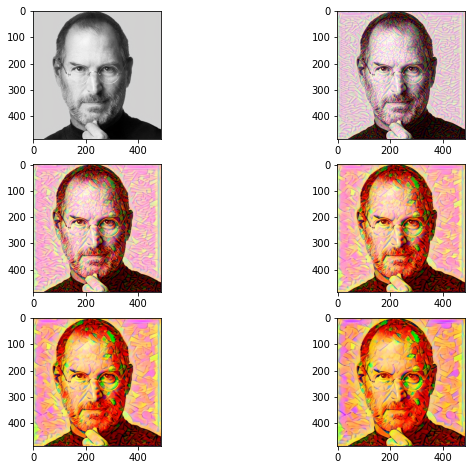

In [60]:
plt.figure(figsize=(10,8))
for i in range(len(results)):
  plt.subplot(3,2,i+1)
  plt.imshow(results[i])
plt.show()

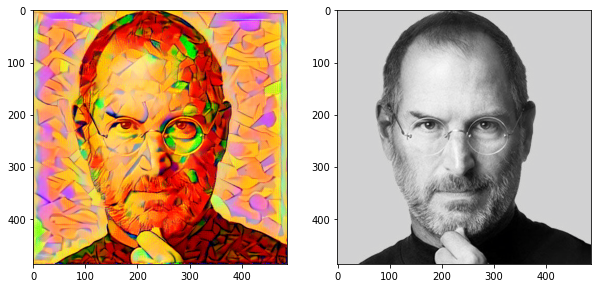

In [61]:
target_copy=deprocess(target.detach())
content_copy=deprocess(content_p)

fig,(ax1,ax2)= plt.subplots(1,2,figsize=(10,5))
ax1.imshow(target_copy)
ax2.imshow(content_copy)